In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
restaurant_df = pd.read_csv('data/full_restaurant_rating_data.csv')
restaurant_df.shape

### Number of reviews histogram

0-2         3935
3-5         1578
6-10        1348
11-15        754
16-20        477
21-100      2062
101-200      497
201-300      177
301-400      109
401-500       67
501-600       50
601-700       39
701-800       14
801-900       14
901-1000       9
>1000         31
Name: reviews_bins, dtype: int64


<AxesSubplot:>

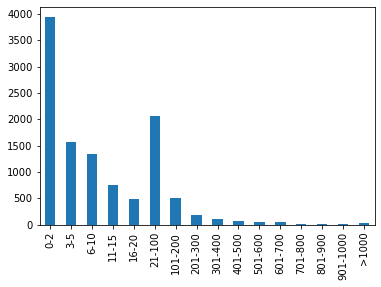

In [3]:
# this is to see how many 0 reviews are there in the dataset
# e.g. (-1, 2] = value of -1 is not included in this bin but a value of 0, 1 and 2 is included
reviews_bins = [-1, 2, 5, 10, 15, 20, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 10000]
reviews_bins_labels = ['0-2', '3-5', '6-10', '11-15', '16-20', '21-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700', '701-800', '801-900', '901-1000', '>1000']

restaurant_df['reviews_bins'] = pd.cut(restaurant_df['num_of_reviews'], reviews_bins, labels = reviews_bins_labels)

# distribution of number_of_review in bins
print(restaurant_df['reviews_bins'].value_counts().sort_index())

# histogram of reviews
restaurant_df['reviews_bins'].value_counts().sort_index().plot.bar()

### Dropping rows with reviews <= 2 (dropping 3935 rows of data)

In [5]:
# dropping rows with reviews <= 2: dropping 3935 rows of data

restaurant_df = restaurant_df[restaurant_df['num_of_reviews'] >= 3]
restaurant_df.shape

(7226, 36)

### Creating a new column in the dataframe called 'total_ratings' that is calculated from the summation of fields from 'num_of_ratings'

In [6]:
restaurant_df['total_ratings'] = restaurant_df['num_of_rating_1'] + restaurant_df['num_of_rating_2'] + restaurant_df['num_of_rating_3'] + restaurant_df['num_of_rating_4'] + restaurant_df['num_of_rating_5']

### Creating a new column in the dataframe called 'total_stars' that is calculated from the multiplication of fields from 'num_of_ratings'

In [7]:
restaurant_df['total_stars'] = (restaurant_df['num_of_rating_1'] * 1) + (restaurant_df['num_of_rating_2'] * 2) + (restaurant_df['num_of_rating_3'] * 3) + (restaurant_df['num_of_rating_4'] * 4) + (restaurant_df['num_of_rating_5'] * 5)   

### Creating a new column in the dataframe called 'average_rating' that is calculated from 'total_stars' / 'total_ratings'

In [8]:
restaurant_df['average_rating'] = round(restaurant_df['total_stars'] / restaurant_df['total_ratings'], 1)


### Visualizing the distribution of average_rating

<AxesSubplot:>

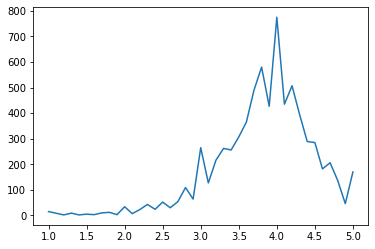

In [10]:
restaurant_df['average_rating'].value_counts().sort_index().plot()

### Viewing 'average_rating' in percentile order

In [11]:
for i in np.arange(0.1, 1.1, 0.1):
    print(f'Average Rating at {round(int(i*100), 2)} percentile: ' + str(round(restaurant_df['average_rating'].quantile(i), 2))) 

Average Rating at 10 percentile: 3.0
Average Rating at 20 percentile: 3.4
Average Rating at 30 percentile: 3.6
Average Rating at 40 percentile: 3.8
Average Rating at 50 percentile: 3.9
Average Rating at 60 percentile: 4.0
Average Rating at 70 percentile: 4.2
Average Rating at 80 percentile: 4.3
Average Rating at 90 percentile: 4.6
Average Rating at 100 percentile: 5.0


### Creating a new column in the dataframe called 'average_rating_category' to bin/categorise 'average_rating' as 0 for ratings below the 50th percentile and 1 for ratings above the 50th percentile

In [21]:
def rating_categories(df) :
    if df['average_rating'] <= 3.9:
        val = 0
    else:
        val = 1
    return val 

restaurant_df['average_rating_category'] = restaurant_df.apply(rating_categories, axis=1)

# Viewing the frequency count for the 'average_rating_category'
restaurant_df['average_rating_category'].value_counts()

0    3796
1    3430
Name: average_rating_category, dtype: int64